In [5]:
import pandas as pd#loading the data set
file_path="EastWestAirlines.xlsx"
xls=pd.ExcelFile(file_path)
xls.sheet_names

['Description', 'data']

In [7]:
df = pd.read_excel(file_path, sheet_name='data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
df.isnull().sum()#Checking the missing values

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [11]:
#removing outliers using Z-score
import numpy as np
from scipy.stats import zscore

In [12]:
#Calucate Z-scores
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))


In [15]:
df_clean = df[(z_scores < 3).all(axis=1)]
print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")

Original shape: (3999, 12), Cleaned shape: (3630, 12)


In [17]:
df_clean,df.columns

(       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 0        1    28143           0          1          1          1          174   
 1        2    19244           0          1          1          1          215   
 2        3    41354           0          1          1          1         4123   
 3        4    14776           0          1          1          1          500   
 4        5    97752           0          4          1          1        43300   
 ...    ...      ...         ...        ...        ...        ...          ...   
 3994  4017    18476           0          1          1          1         8525   
 3995  4018    64385           0          1          1          1          981   
 3996  4019    73597           0          3          1          1        25447   
 3997  4020    54899           0          1          1          1          500   
 3998  4021     3016           0          1          1          1            0   
 
       Bonus_t

In [19]:
#Feature scaling
from sklearn.preprocessing import StandardScaler


In [21]:
numeric_cols=df_clean.select_dtypes(include=[np.number]).columns

In [23]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df_clean[numeric_cols])

In [25]:
#recreating DataFrame
df_scaled=pd.DataFrame(scaled_data, columns=numeric_cols)
df_scaled.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.766325,-0.523260,-0.158869,-0.755664,0.0,0.0,-0.779029,-1.147142,-0.401822,-0.431775,1.431438,-0.718093
1,-1.765460,-0.667084,-0.158869,-0.755664,0.0,0.0,-0.776768,-1.025933,-0.401822,-0.431775,1.415848,-0.718093
2,-1.764596,-0.309747,-0.158869,-0.755664,0.0,0.0,-0.561235,-0.783516,-0.401822,-0.431775,1.448002,-0.718093
3,-1.763731,-0.739295,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,-0.401822,-0.431775,1.408053,-0.718093
4,-1.762866,0.601746,-0.158869,1.517591,0.0,0.0,1.599448,1.883076,2.859455,1.768005,1.399771,1.392577


In [27]:
#EDA
df_clean.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.0,3630.0,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,2043.135813,60519.392562,39.584573,1.997245,1.0,1.0,14299.180716,10.464187,255.907438,0.785124,4061.804408,0.340220
std,1156.308525,61882.862343,249.199005,1.319875,0.0,0.0,18134.266531,8.251370,636.954758,1.818614,2052.901389,0.473848
min,1.000000,0.000000,0.000000,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1054.250000,17481.000000,0.000000,1.000000,1.0,1.0,1000.000000,3.000000,0.000000,0.000000,2284.000000,0.000000
50%,2054.500000,39220.000000,0.000000,1.000000,1.0,1.0,5894.500000,11.000000,0.000000,0.000000,4022.000000,0.000000
75%,3041.750000,82121.500000,0.000000,3.000000,1.0,1.0,21631.250000,16.000000,150.000000,1.000000,5715.750000,1.000000
max,4021.000000,370941.000000,2454.000000,5.000000,1.0,1.0,89360.000000,39.000000,4652.000000,12.000000,8296.000000,1.000000


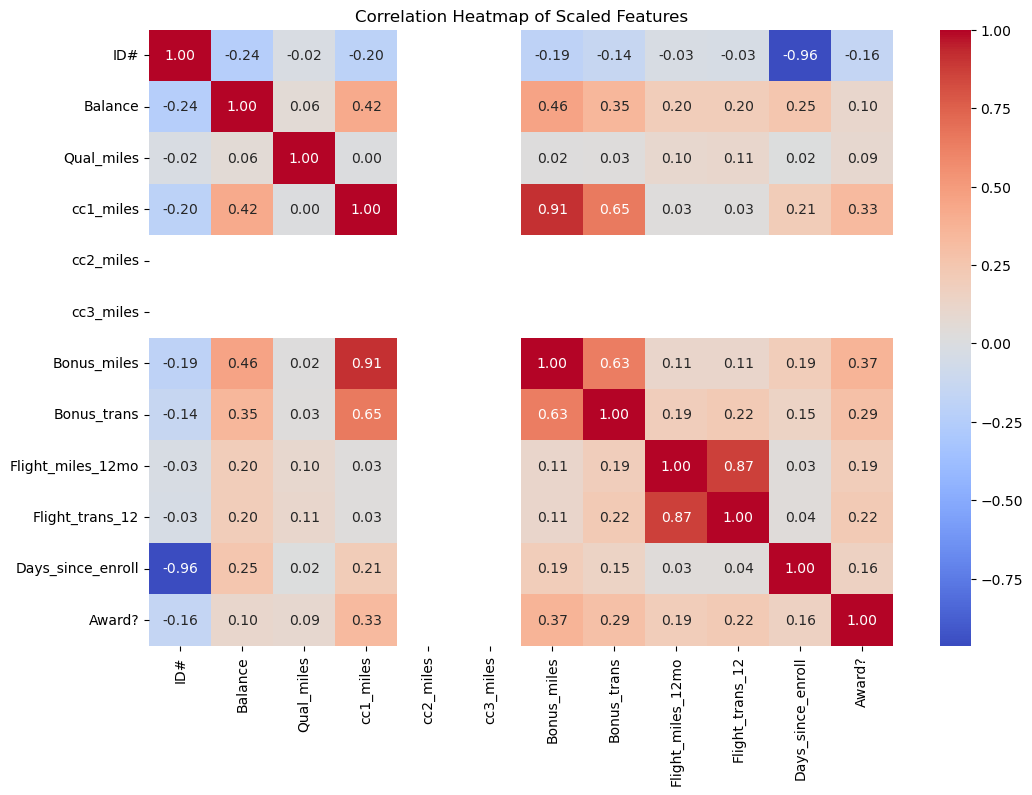

In [29]:
#Correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Scaled Features')
plt.show()

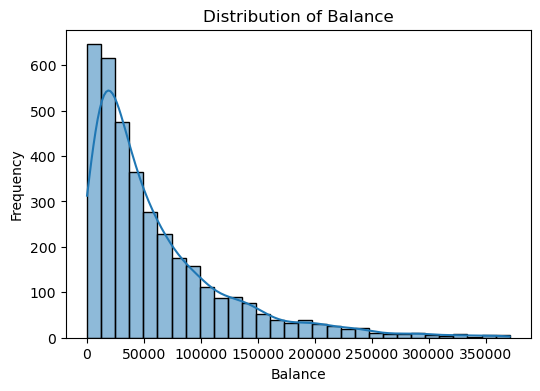

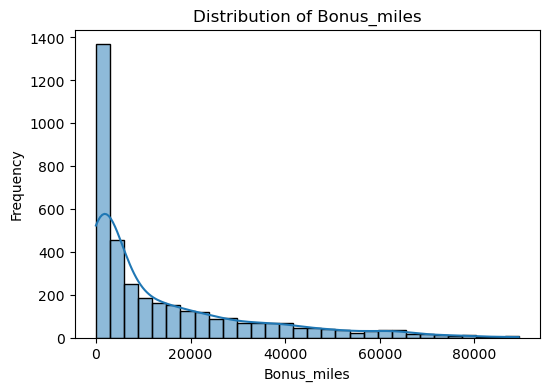

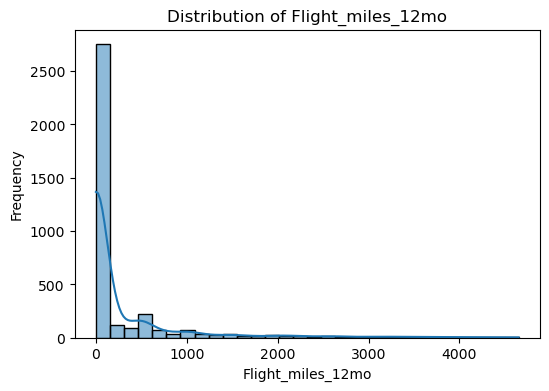

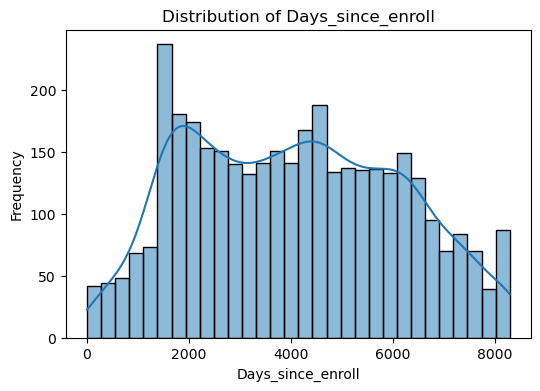

In [30]:
#Visualizing to understand hidden patterns
features_to_plot = ['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Days_since_enroll']

for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_clean[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

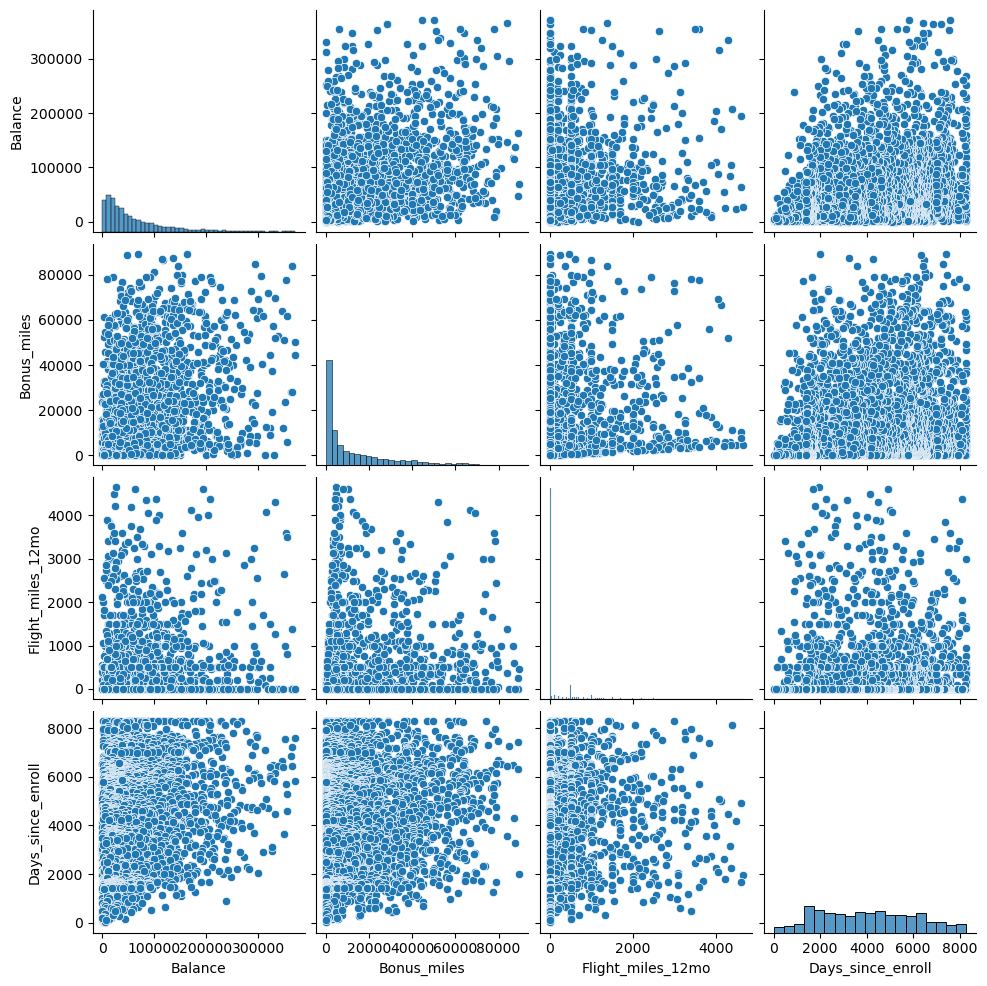

In [33]:
#Visualizing Pair relationship
sns.pairplot(df_clean[features_to_plot])

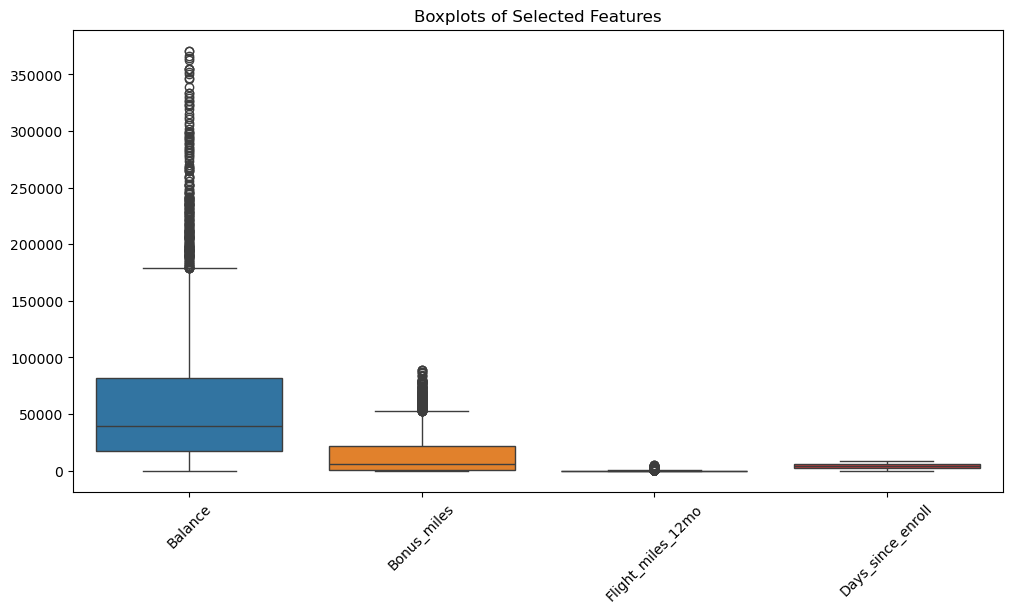

In [34]:
# Boxplot for visual outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[features_to_plot])
plt.title("Boxplots of Selected Features")
plt.xticks(rotation=45)
plt.show()

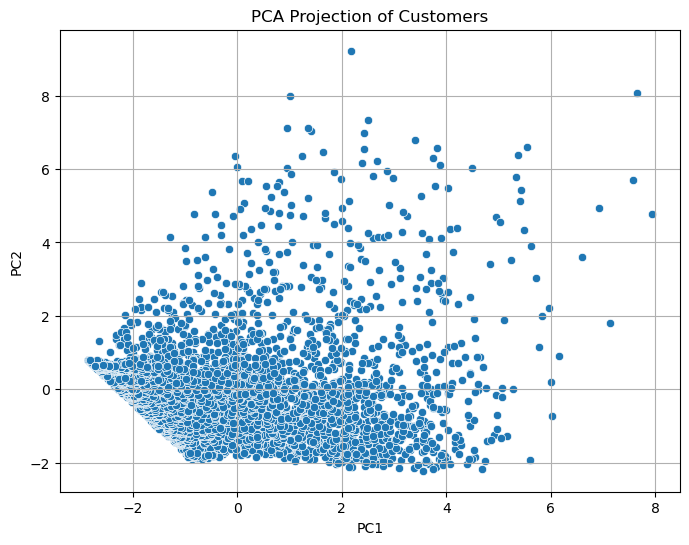

In [35]:
#PCA for @d projection
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

# Scatter plot of PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1])
plt.title("PCA Projection of Customers")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

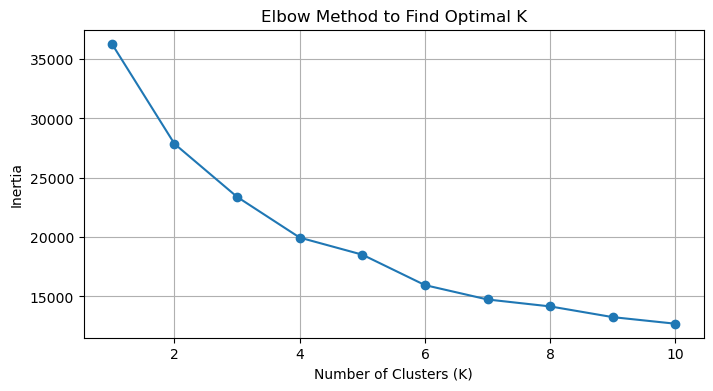

In [36]:
#Cluster algorithms
#kmeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method to Find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [37]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)


In [40]:
df_clean['KMeans_Cluster'] = kmeans_labels

C:\Users\nimma\AppData\Local\Temp\ipykernel_16060\1612255250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['KMeans_Cluster'] = kmeans_labels


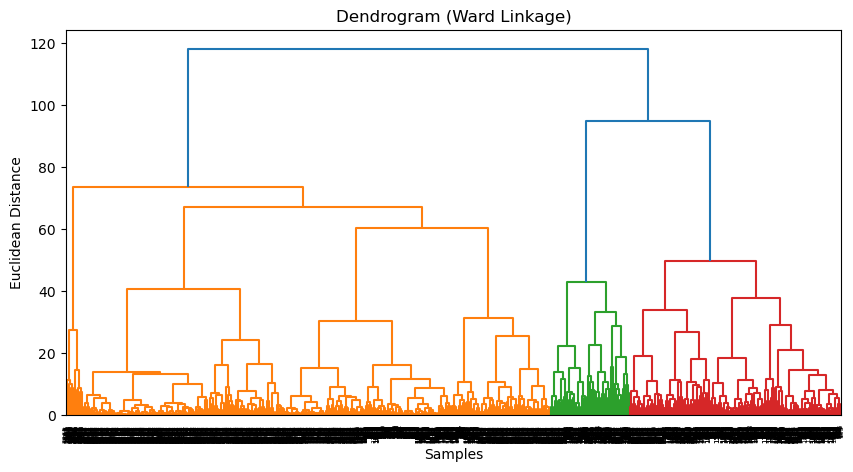

In [42]:
#Hierarchal method
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 5))
linkage_matrix = linkage(df_scaled, method='ward')  # Try 'average', 'complete' too
dendrogram(linkage_matrix)
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

In [46]:
#Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

In [47]:
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(df_scaled)

In [48]:
df_clean['Hierarchical_Cluster'] = hc_labels

C:\Users\nimma\AppData\Local\Temp\ipykernel_16060\870077034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Hierarchical_Cluster'] = hc_labels


In [49]:
#DBSCAN
from sklearn.cluster import DBSCAN

In [50]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

In [51]:
df_clean['DBSCAN_Cluster'] = dbscan_labels
df_clean['DBSCAN_Cluster'].value_counts()

C:\Users\nimma\AppData\Local\Temp\ipykernel_16060\1869652258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DBSCAN_Cluster'] = dbscan_labels


DBSCAN_Cluster
 0    2272
 1    1053
-1     290
 2       8
 3       4
 4       3
Name: count, dtype: int64

In [52]:
#Evaluting the clustering process
from sklearn.metrics import silhouette_score

In [53]:
score_kmeans = silhouette_score(df_scaled, kmeans_labels)
score_kmeans

0.24232976964087152

In [54]:
score_hierarchical = silhouette_score(df_scaled, hc_labels)
score_hierarchical

0.27961095816015374

In [55]:
if len(set(dbscan_labels)) > 1:
    score_dbscan = silhouette_score(df_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {score_dbscan:.3f}")
else:
    print("DBSCAN formed only one cluster or all noise.")

DBSCAN Silhouette Score: 0.189


In [56]:
kmeans_analysis = df_clean.groupby('KMeans_Cluster').mean()
kmeans_analysis

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Cluster,DBSCAN_Cluster
KMeans_Cluster,,,,,,,,,,,,,,
0,1110.182983,47024.247941,41.214090,1.247941,1.0,1.0,4460.878317,6.918573,114.660567,0.401647,5681.268070,0.241537,0.370540,0.191217
1,1976.865801,98707.484848,154.064935,2.047619,1.0,1.0,19792.246753,16.402597,2267.173160,6.415584,4235.523810,0.627706,1.991342,-0.350649
2,1583.102167,101300.135191,31.779154,3.782250,1.0,1.0,36668.642931,17.748194,162.667699,0.507740,4887.000000,0.599587,0.928793,0.482972
3,3150.688856,35397.630516,24.130142,1.307405,1.0,1.0,5180.525056,7.057592,91.456993,0.326851,2109.809274,0.183246,0.150337,0.154824


In [57]:
hc_analysis = df_clean.groupby('Hierarchical_Cluster').mean()
hc_analysis

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster,DBSCAN_Cluster
Hierarchical_Cluster,,,,,,,,,,,,,,
0,2357.928409,38466.494300,0.000000,1.318741,1.0,1.0,5190.529412,6.943456,52.978112,0.194710,3487.677155,0.218878,1.816689,0.217510
1,1357.257345,101634.823708,3.512665,3.582573,1.0,1.0,34332.260385,17.192503,147.788247,0.494428,5289.335360,0.510638,1.668693,0.429585
2,2012.830189,78737.164420,71.525606,1.792453,1.0,1.0,14592.832884,13.382749,1752.247978,5.056604,4164.164420,0.547170,1.161725,-0.051213
3,2016.113924,73459.670886,1439.101266,1.987342,1.0,1.0,15484.974684,10.430380,212.810127,0.746835,4182.215190,0.607595,1.493671,-1.000000


In [58]:
df_clean['DBSCAN_Cluster'].value_counts()

# Summary stats per cluster
dbscan_analysis = df_clean.groupby('DBSCAN_Cluster').mean()
dbscan_analysis

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster,Hierarchical_Cluster
DBSCAN_Cluster,,,,,,,,,,,,,,
-1,1847.148276,114020.334483,495.489655,2.444828,1.0,1.0,24953.558621,17.503448,1492.120690,4.355172,4463.096552,0.6,1.293103,2.096552
0,2176.839789,53325.634243,0.000000,1.664613,1.0,1.0,9071.929137,8.408451,93.229754,0.312500,3807.976232,0.0,1.751320,0.286532
1,1804.619183,61534.791073,0.000000,2.605888,1.0,1.0,22744.000950,12.972460,231.368471,0.723647,4505.888889,1.0,1.719848,0.642925
2,1878.625000,48137.750000,0.000000,1.000000,1.0,1.0,9445.125000,11.000000,2623.875000,8.500000,4240.250000,1.0,1.000000,2.000000
3,2174.000000,60367.000000,0.000000,1.000000,1.0,1.0,5531.750000,7.250000,2609.750000,5.750000,3887.000000,0.0,1.000000,2.000000
4,3713.666667,13650.666667,0.000000,1.000000,1.0,1.0,3650.000000,9.333333,3116.666667,8.000000,1386.333333,0.0,1.000000,2.000000


In [59]:
#PCA visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

In [61]:
df_clean['PCA1'] = pca_components[:, 0]
df_clean['PCA2'] = pca_components[:, 1]

C:\Users\nimma\AppData\Local\Temp\ipykernel_16060\494010946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['PCA1'] = pca_components[:, 0]
C:\Users\nimma\AppData\Local\Temp\ipykernel_16060\494010946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['PCA2'] = pca_components[:, 1]


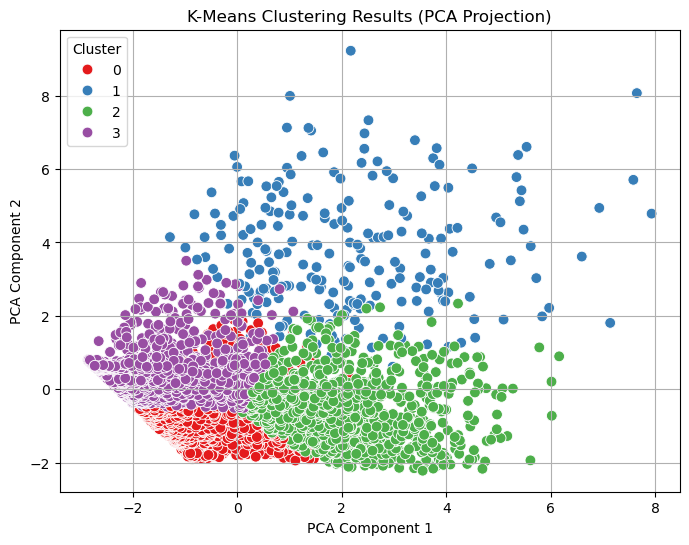

In [62]:
#KMeans visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_clean,
    x='PCA1', y='PCA2',
    hue='KMeans_Cluster',
    palette='Set1',
    s=60
)
plt.title('K-Means Clustering Results (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

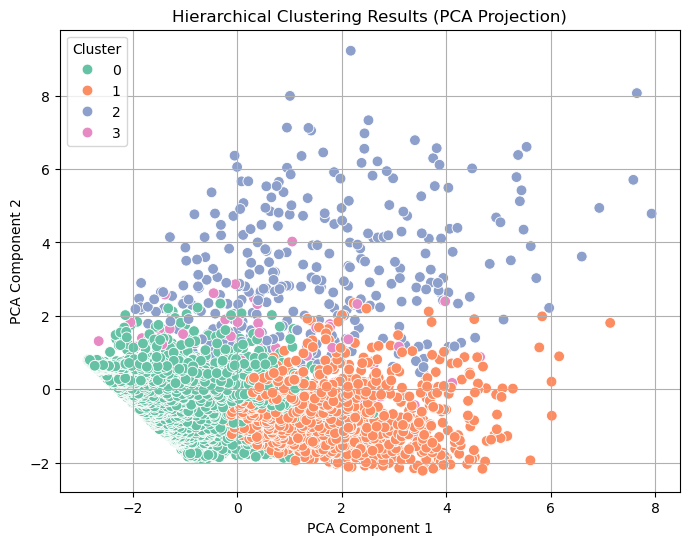

In [63]:
#Hierarchal visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_clean,
    x='PCA1', y='PCA2',
    hue='Hierarchical_Cluster',  # or 'Hierarchical_Single' if used
    palette='Set2',
    s=60)
plt.title('Hierarchical Clustering Results (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

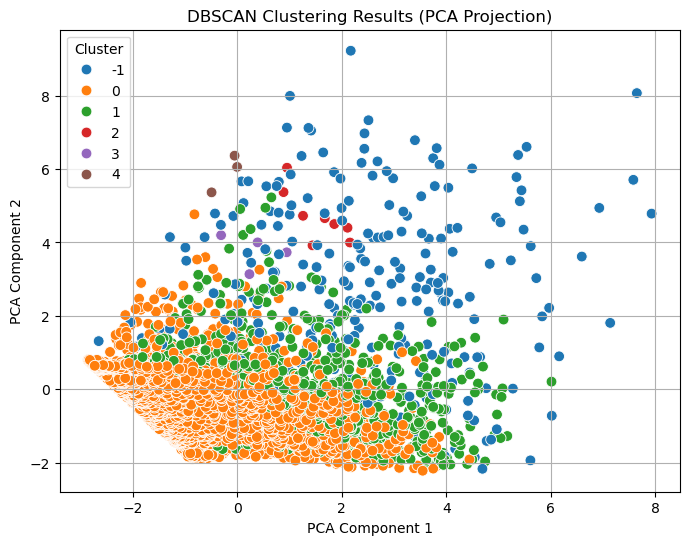

In [64]:
#DBSCAN visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_clean,
    x='PCA1', y='PCA2',
    hue='DBSCAN_Cluster',
    palette='tab10',
    s=60)
plt.title('DBSCAN Clustering Results (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [65]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [66]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
df_clean['KMeans_Cluster'] = kmeans_labels

C:\Users\nimma\AppData\Local\Temp\ipykernel_16060\3849691372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['KMeans_Cluster'] = kmeans_labels


In [67]:
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(df_scaled)
df_clean['Hierarchical_Cluster'] = hc_labels

C:\Users\nimma\AppData\Local\Temp\ipykernel_16060\1913543054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Hierarchical_Cluster'] = hc_labels


In [68]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
df_clean['DBSCAN_Cluster'] = dbscan_labels

C:\Users\nimma\AppData\Local\Temp\ipykernel_16060\2772765999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DBSCAN_Cluster'] = dbscan_labels


In [69]:
#Evaluating
score_kmeans = silhouette_score(df_scaled, kmeans_labels)
score_kmeans

0.24232976964087152

In [70]:
score_hierarchical = silhouette_score(df_scaled, hc_labels)
score_hierarchical

0.27961095816015374

In [73]:
if len(set(dbscan_labels)) > 1:
    score_dbscan = silhouette_score(df_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {score_dbscan:.3f}")
else:
    print("DBSCAN formed only one cluster or all noise.")

DBSCAN Silhouette Score: 0.189
